In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

#Se descarga el conjunto de datos

Más información en: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data

In [ ]:
df = pd.read_csv("/content/train.csv", parse_dates=['Order Date'], infer_datetime_format = True, dayfirst = True)

In [ ]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
for i in ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales']:
  print(i, len(df[i].unique()))

Row ID 9789
Order ID 4916
Order Date 1229
Ship Date 1326
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 529
State 48
Postal Code 626
Region 4
Product ID 1860
Category 3
Sub-Category 17
Product Name 1848
Sales 5750


#Dataframe

In [ ]:
Datos = df[["Order Date", "Sales"]].sort_values(by="Order Date" ,ascending= True).groupby(by = "Order Date").sum()

In [ ]:
cm = sns.light_palette("green", as_cmap=True)

In [ ]:
Datos.head(20).style.background_gradient(cmap = cm)

,Sales,month,day_of_week
Order Date,,,
2015-01-03 00:00:00,16.448000,1,6
2015-01-04 00:00:00,288.060000,1,7
2015-01-05 00:00:00,19.536000,1,1
2015-01-06 00:00:00,4407.100000,1,2
2015-01-07 00:00:00,87.158000,1,3
2015-01-08 00:00:00,0.000000,1,4
2015-01-09 00:00:00,40.544000,1,5
2015-01-10 00:00:00,54.830000,1,6
2015-01-11 00:00:00,9.940000,1,7


In [ ]:
Datos

,Sales
Order Date,
2015-01-03,16.4480
2015-01-04,288.0600
2015-01-05,19.5360
2015-01-06,4407.1000
2015-01-07,87.1580
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


In [ ]:
Datos = Datos.asfreq(freq ='D', fill_value = 0)

In [ ]:
Datos.head(15)

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,288.060
2015-01-05,19.536
2015-01-06,4407.100
2015-01-07,87.158
2015-01-08,0.000
2015-01-09,40.544
2015-01-10,54.830
2015-01-11,9.940


In [ ]:
Datos.index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1458, freq='D')

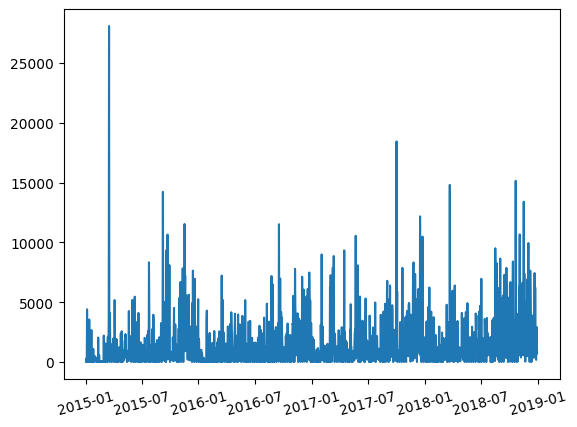

In [ ]:
plt.plot(Datos.index, Datos["Sales"])

plt.xticks(rotation = 15)

plt.show()

In [ ]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1458 entries, 2015-01-03 to 2018-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   1458 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [ ]:
fig = px.line(Datos, x = Datos.index, y = "Sales")

fig.show()

<Axes: xlabel='Sales', ylabel='Density'>

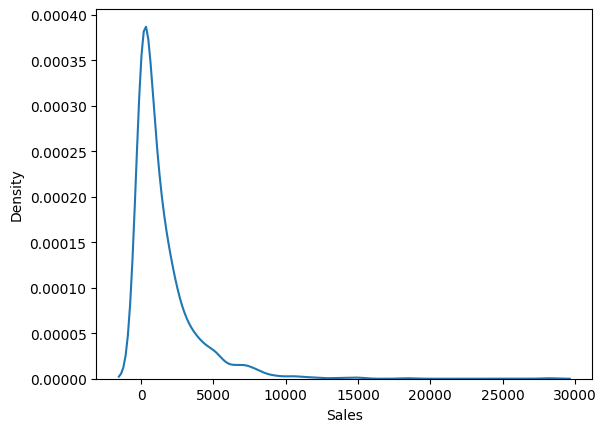

In [ ]:
sns.kdeplot(data = Datos, x = "Sales")

In [ ]:
Datos["Sales"].skew()

3.398667830868131

In [ ]:
Datos['month'] = Datos.index.month

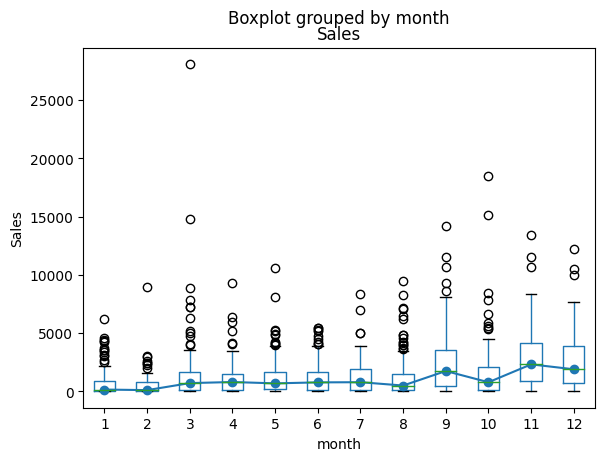

In [ ]:
Datos.boxplot(column="Sales", by = "month")
Datos.groupby("month")["Sales"].median().plot( style = "o-" )

plt.ylabel("Sales")

plt.show()

In [ ]:
Datos["day_of_week"] = Datos.index.day_of_week+1

<Axes: title={'center': 'Sales'}, xlabel='day_of_week'>

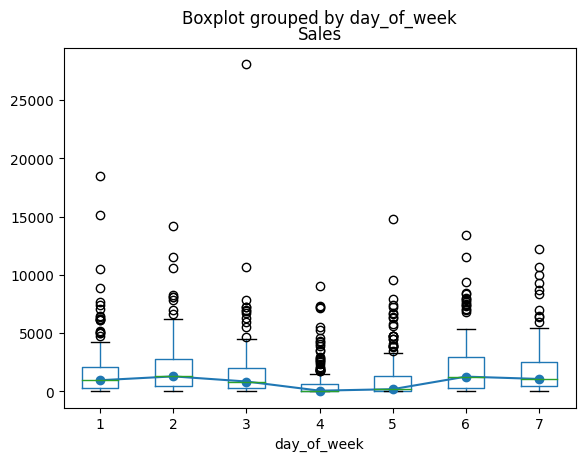

In [ ]:
Datos.boxplot(column="Sales", by = "day_of_week")
Datos.groupby("day_of_week")["Sales"].median().plot( style = "o-" )

#ACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

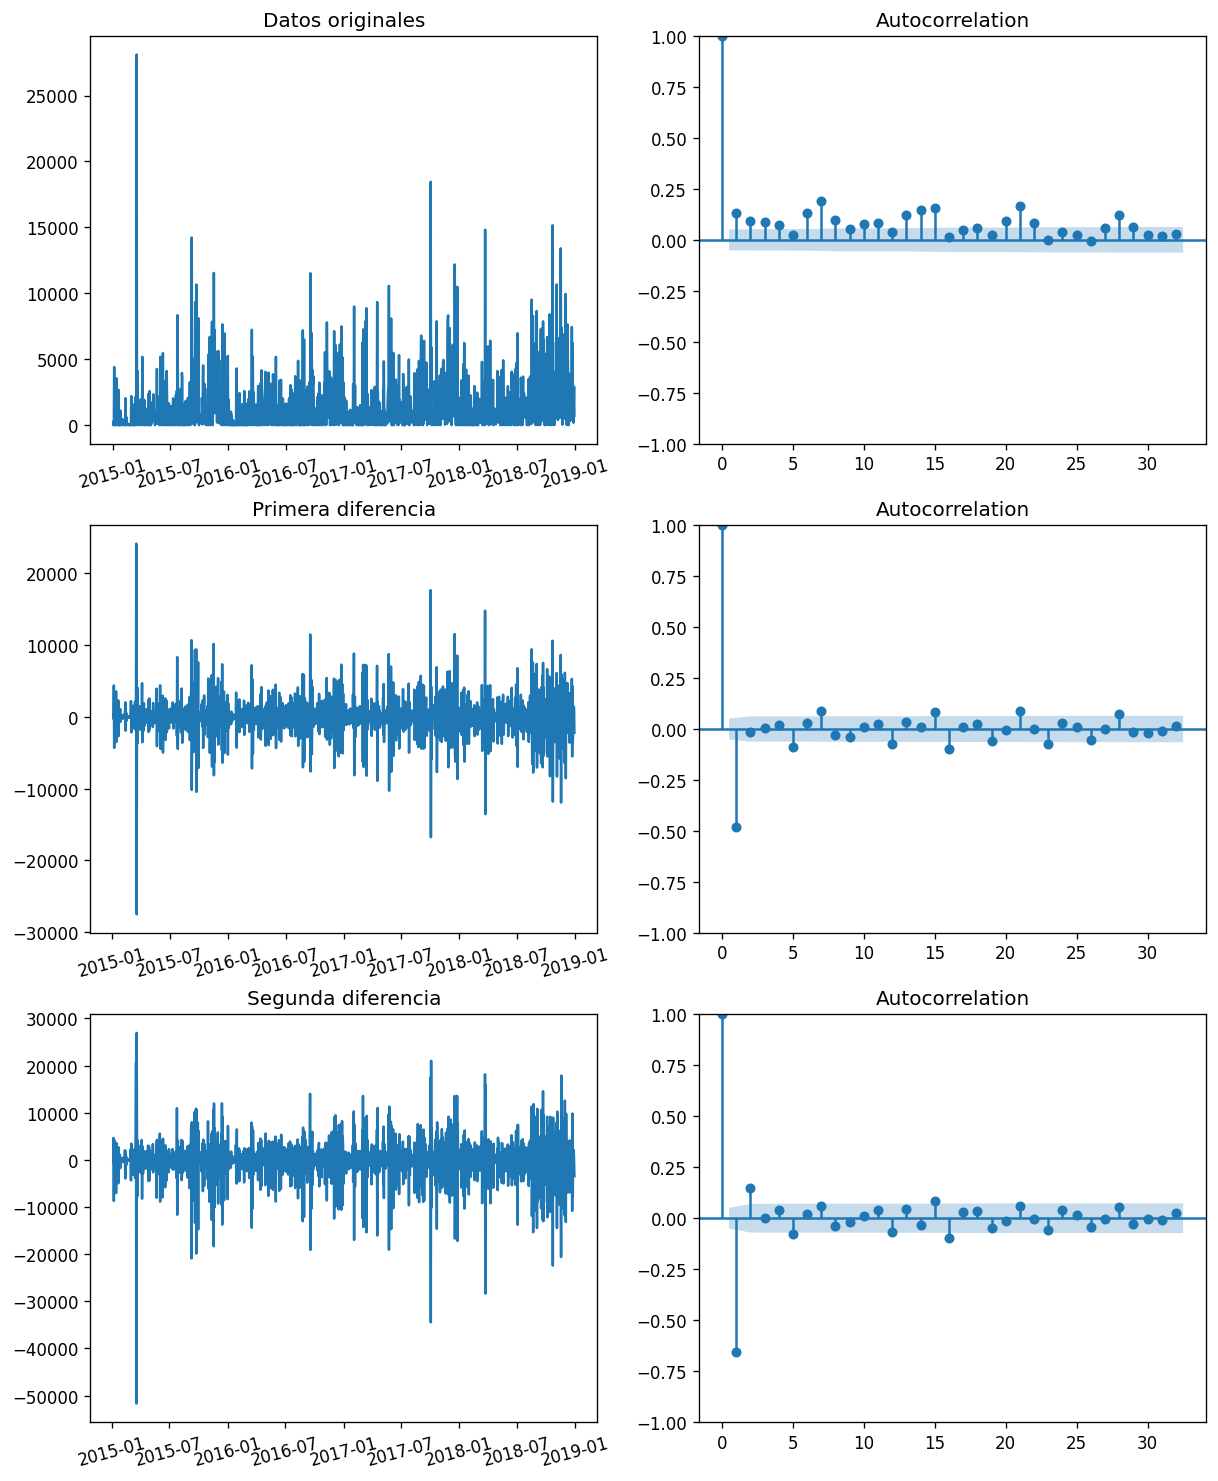

In [ ]:
plt.rcParams.update({"figure.figsize":(12,15), "figure.dpi":120})

fig, axes = plt.subplots(3, 2, sharex = False)

axes[0, 0].plot(Datos.Sales); axes[0, 0].set_title("Datos originales")
plot_acf(Datos.Sales, ax = axes[0,1])

axes[0, 0].tick_params(axis='x', rotation=15)

axes[1, 0].plot(Datos.Sales.diff()); axes[1, 0].set_title("Primera diferencia")
plot_acf(Datos.Sales.diff().dropna(), ax = axes[1,1])

axes[1, 0].tick_params(axis='x', rotation=15)

axes[2, 0].plot(Datos.Sales.diff().diff()); axes[2, 0].set_title("Segunda diferencia")
plot_acf(Datos.Sales.diff().diff().dropna(), ax = axes[2,1])

axes[2, 0].tick_params(axis='x', rotation=15)

plt.show()

In [ ]:
plt.rcParams.update({"figure.figsize":(24,12), "figure.dpi":80})

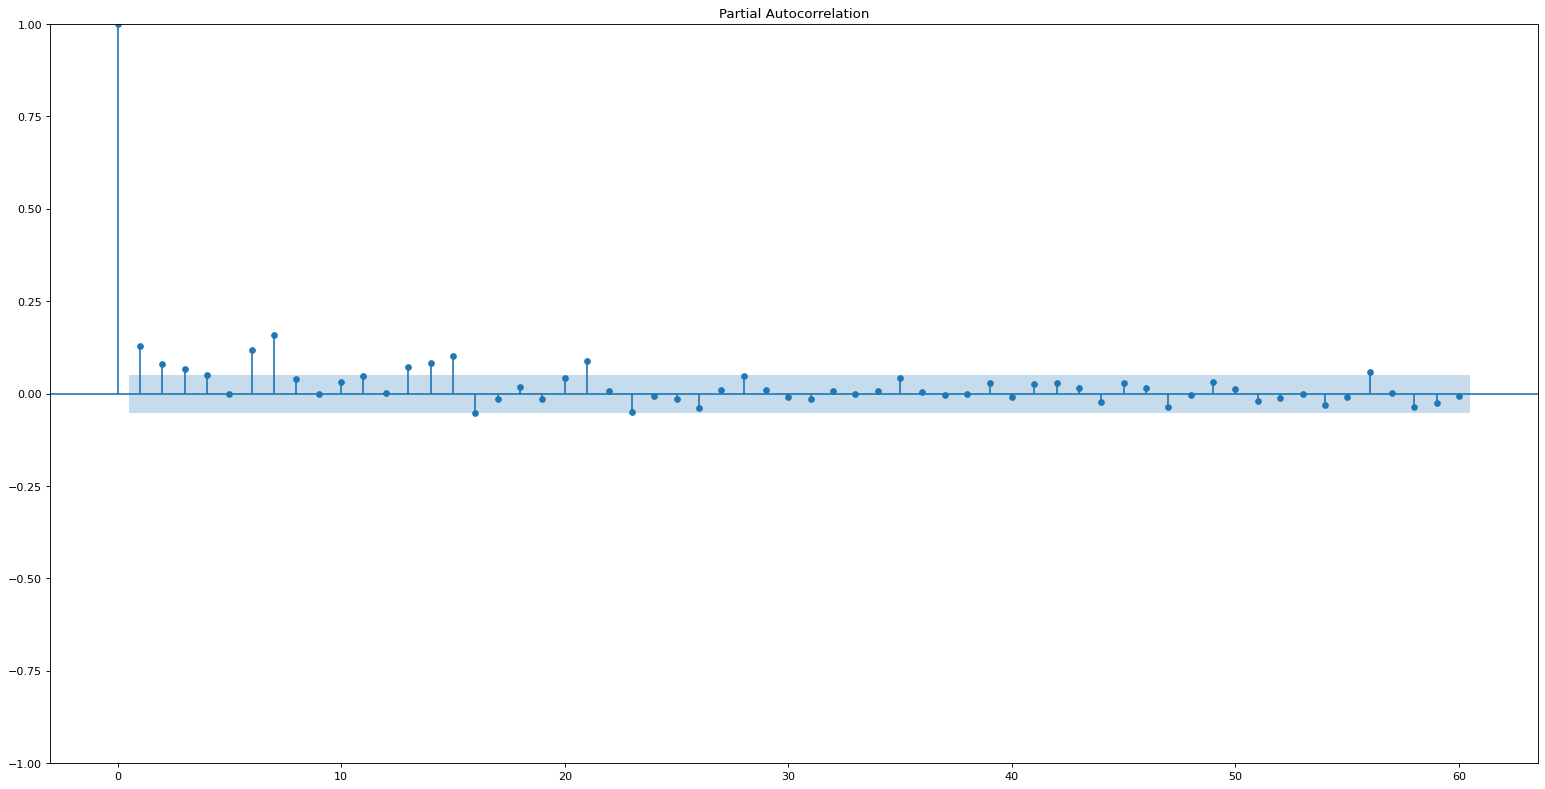

In [ ]:
plot_pacf(Datos["Sales"], lags = 60);

#Rolling statistics

In [ ]:
rolmean = Datos.Sales.rolling(window=36).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = Datos.Sales.rolling(window=36).std()

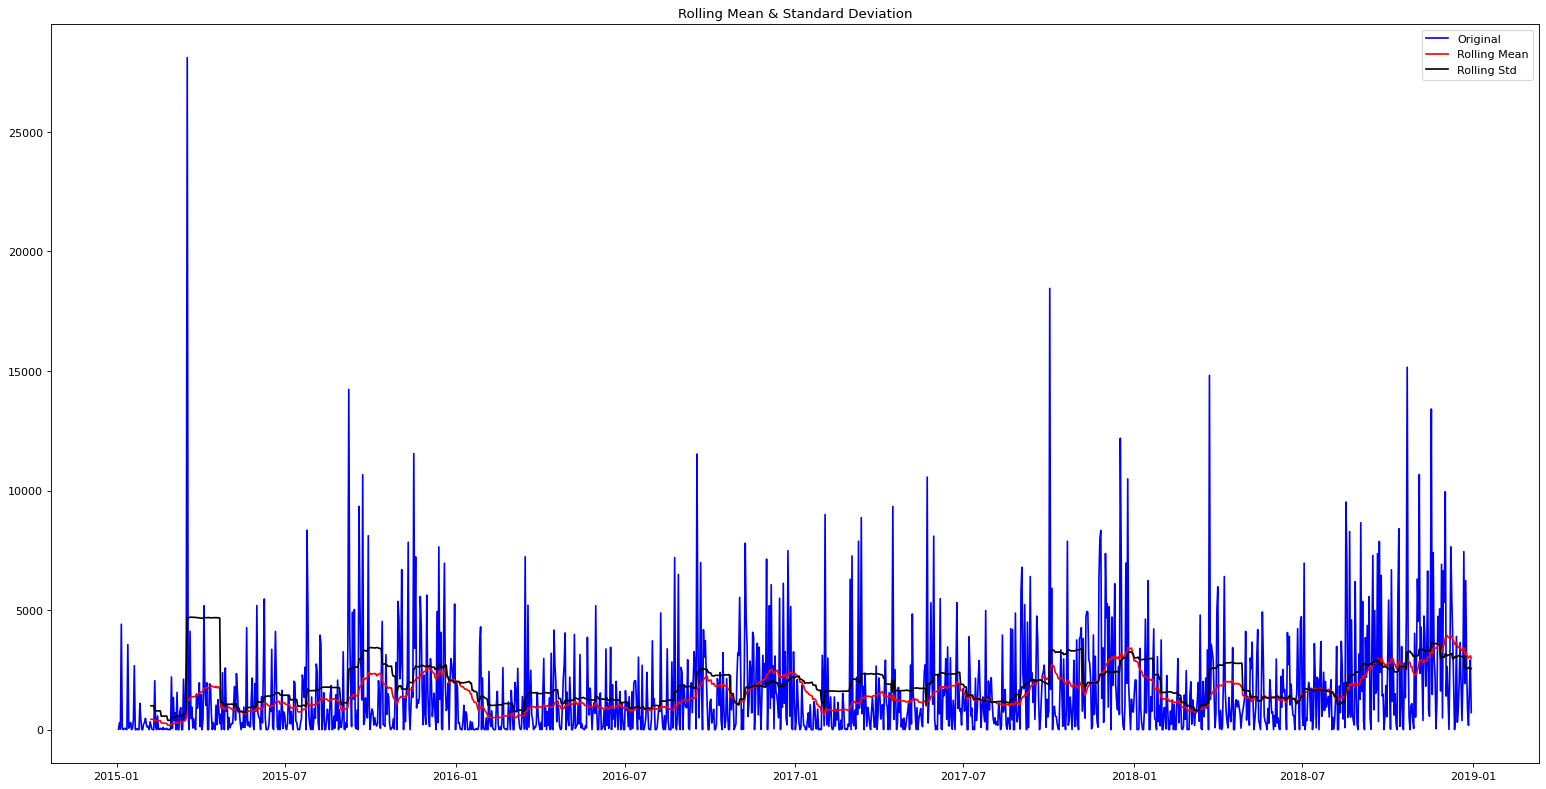

In [ ]:
#Plot rolling statistics
plt.rcParams.update({"figure.figsize":(24,12), "figure.dpi":80})
orig = plt.plot(Datos.Sales, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#AdFuller

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
dftest = adfuller(Datos["Sales"], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "No lags used", "Número de observaciones utilizadas"])
for key, value in dftest[4].items():
  dfoutput["Critical Value (%s)" %key] = value

In [ ]:
dfoutput

Test Statistic                          -4.874557
p-value                                  0.000039
No lags used                            20.000000
Número de observaciones utilizadas    1437.000000
Critical Value (1%)                     -3.434909
Critical Value (5%)                     -2.863553
Critical Value (10%)                    -2.567842
dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
plt.rcParams.update({"figure.figsize":(17,12), "figure.dpi":80})

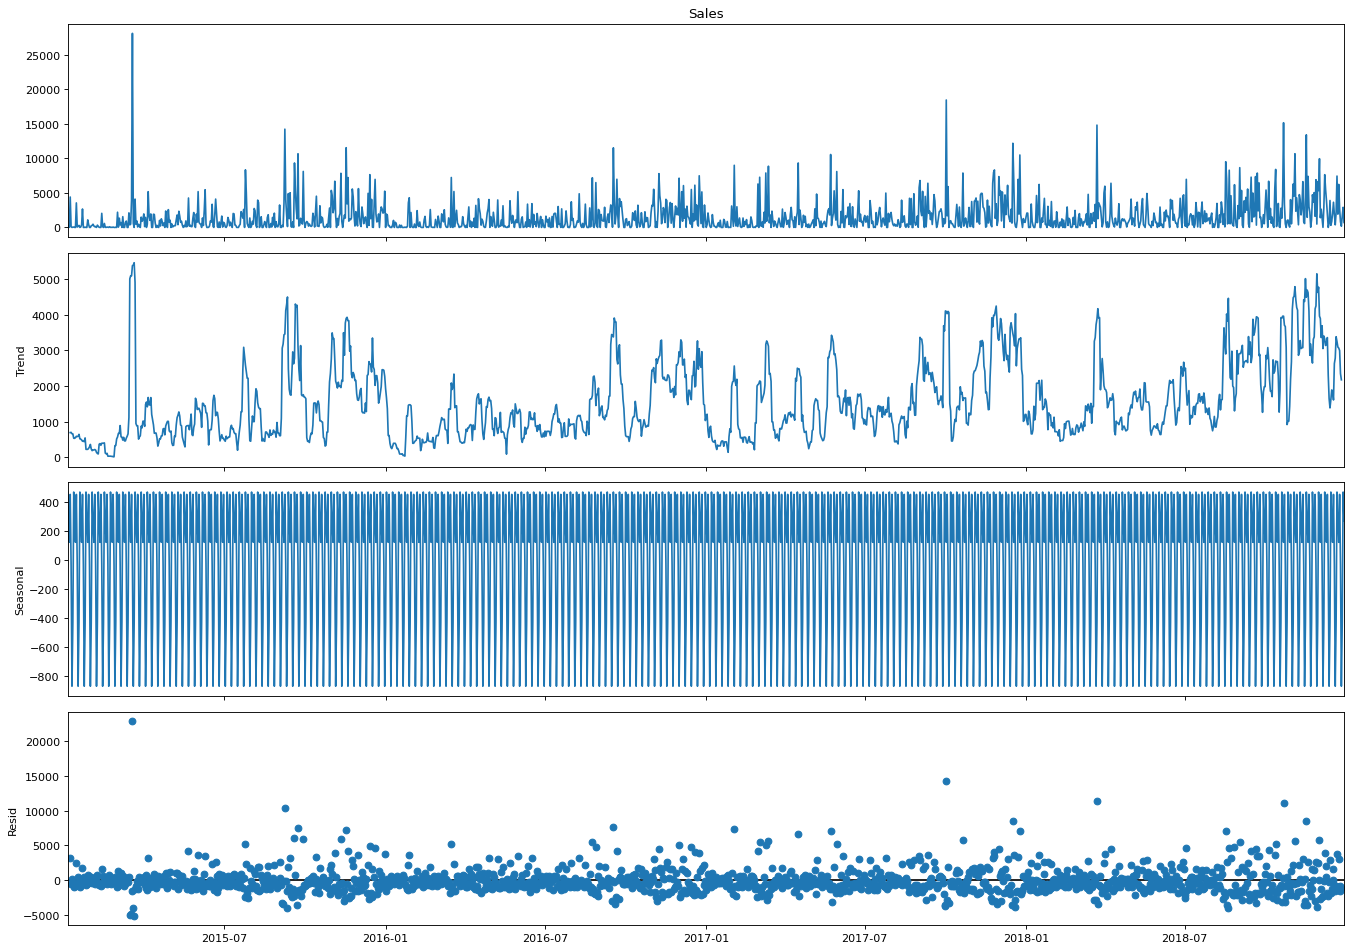

In [ ]:
decomposition = sm.tsa.seasonal_decompose(Datos["Sales"], model='additive')
decomposition.plot()
plt.show()

(17850.0, 17897.0)

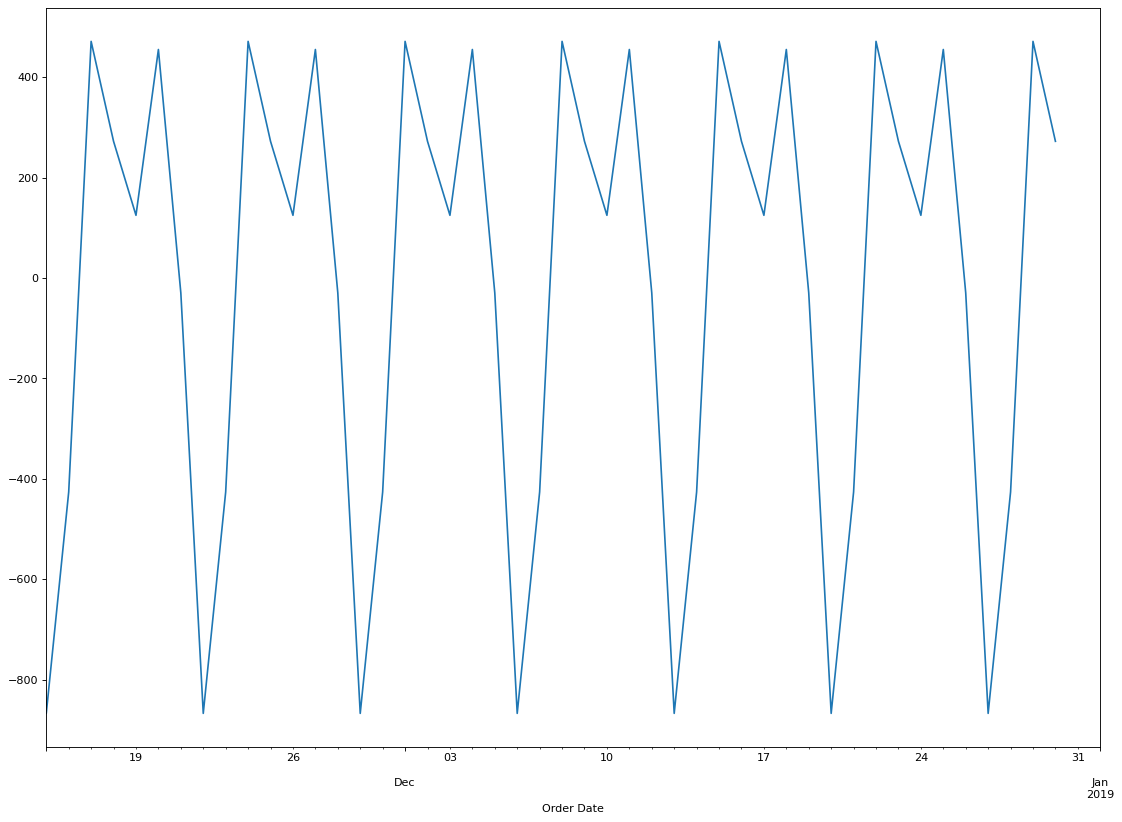

In [ ]:
decomposition.seasonal.plot()

plt.xlim("2018-11-15", "2019")


#Se crea un conjunto de entrenamiento y prueba

In [ ]:
train_data = Datos[:len(Datos)-16]
test_data = Datos[len(Datos)-16:]

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]
#seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] #for loop for creating combinations of seasonal parameters of SARIMA

In [ ]:
import warnings

# Deshabilitar todas las advertencias de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
for parameters in pdq: #for loop for determining the best combination of seasonal parameters for SARIMA
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data["Sales"],
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #determines the AIC value of the model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:26846.256315759696
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:26846.256315759696
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:26846.256315759696
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:26846.256315759696
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:26846.256315759696
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:26846.256315759696
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:26846.256315759696
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:26846.256315759696
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:26658.160289631953
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:26658.160289631953
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:26658.160289631953
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:26658.160289631953
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:26658.160289631953
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:26658.160289631953
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:26658.160289631953
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:26658.160289631953
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:27053.335203016068
SARIMA(0, 1, 0)x(0, 0, 1, 12)12

#Auto arima

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
model = auto_arima(train_data["Sales"], start_p = 0, start_q = 0,
                   max_p = 10, max_d = 2, max_q = 10, max_order = 100, start_P=0,
                   D=1, start_Q=0, max_P = 2, max_D = 1,
                   max_Q = 2, m = 12, seasonal = True,
                   error_action = "warn", trace = True,
                   supress_warnings = True, stepwise = True,
                   random_state = 42
                   )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=27006.737, Time=0.41 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=26590.617, Time=16.51 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=36.76 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=27004.828, Time=0.46 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=27007.744, Time=0.46 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=26404.342, Time=34.07 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=35.05 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=15.04 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=26411.186, Time=19.71 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=26404.177, Time=18.66 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=26591.673, Time=6.74 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=26183.074, Time=43.58 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=17.05 sec
 ARIMA(2,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=47.71 sec
 ARIMA(2,0,0)(1,1,2)[12] 

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1442
Model:             SARIMAX(3, 0, 0)x(2, 1, [1], 12)   Log Likelihood              -13078.597
Date:                              Wed, 13 Dec 2023   AIC                          26173.194
Time:                                      07:12:40   BIC                          26215.318
Sample:                                  01-03-2015   HQIC                         26188.924
                                       - 12-14-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     78.5224     14.016      5.602      0.000      51.052     105.993
ar.L1          0.0809      0.028      2.924      0.003       0.027       0.135
ar.L2          0.0566      0.029      1.949      0.051      -0.000       0.114
ar.L3          0.0411      0.030      1.377      0.168      -0.017       0.100
ar.S.L12      -0.1217      0.037     -3.300      0.001      -0.194      -0.049
ar.S.L24      -0.0818      0.033     -2.492      0.013      -0.146      -0.017
ma.S.L12      -0.8489      0.025    -33.611      0.000      -0.898      -0.799
sigma2      5.551e+06   9.88e+04     56.207      0.000    5.36e+06    5.74e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             31886.01
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             3.19
Prob(H) (two-sided):                  0.01   Kurtosis:                        25.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.predict(start = len(train_data), end = len(df)-1)

2018-12-15    3216.429978
2018-12-16    2921.601563
2018-12-17    2753.974620
2018-12-18    2471.114169
2018-12-19    3651.742923
2018-12-20    3529.313521
2018-12-21    3914.755214
2018-12-22    4303.075664
2018-12-23    3914.635508
2018-12-24    3426.790774
Freq: D, dtype: float64

#Modelo SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
arima_model = SARIMAX(train_data["Sales"], order = (1,1,1) , seasonal_order = (1,1,1,12)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Prueba jungbox

In [ ]:
sm.stats.acorr_ljungbox(arima_model.resid, lags = [10],return_df = True)

,lb_stat,lb_pvalue
10,29.225332,0.001146


In [ ]:
residuals = pd.DataFrame(arima_model.resid)

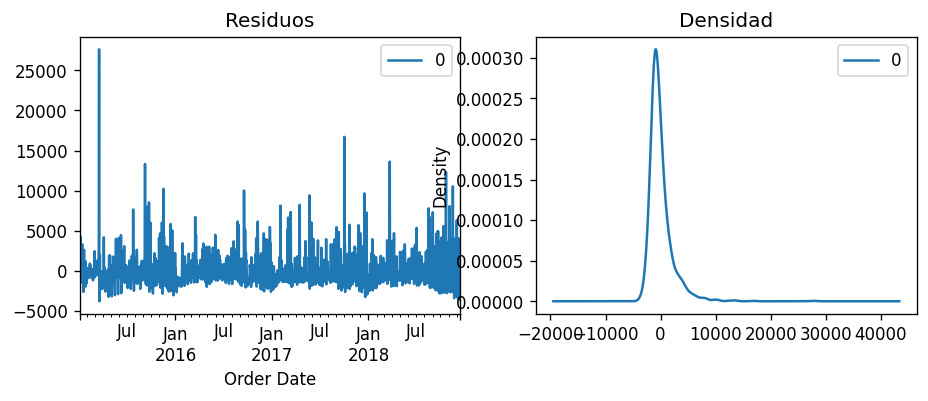

In [ ]:
plt.rcParams.update( {"figure.figsize":(9,3), "figure.dpi":120} )

fig, ax = plt.subplots(1,2)

residuals.plot(title="Residuos", ax = ax[0])

residuals.plot(kind = "kde", title = "Densidad", ax = ax[1])

plt.show()

In [ ]:
residuals.describe()

,0
count,1442.000000
mean,-2.114168
std,2169.881269
min,-3770.086476
25%,-1240.365241
50%,-532.249285
75%,625.094149
max,27625.326677


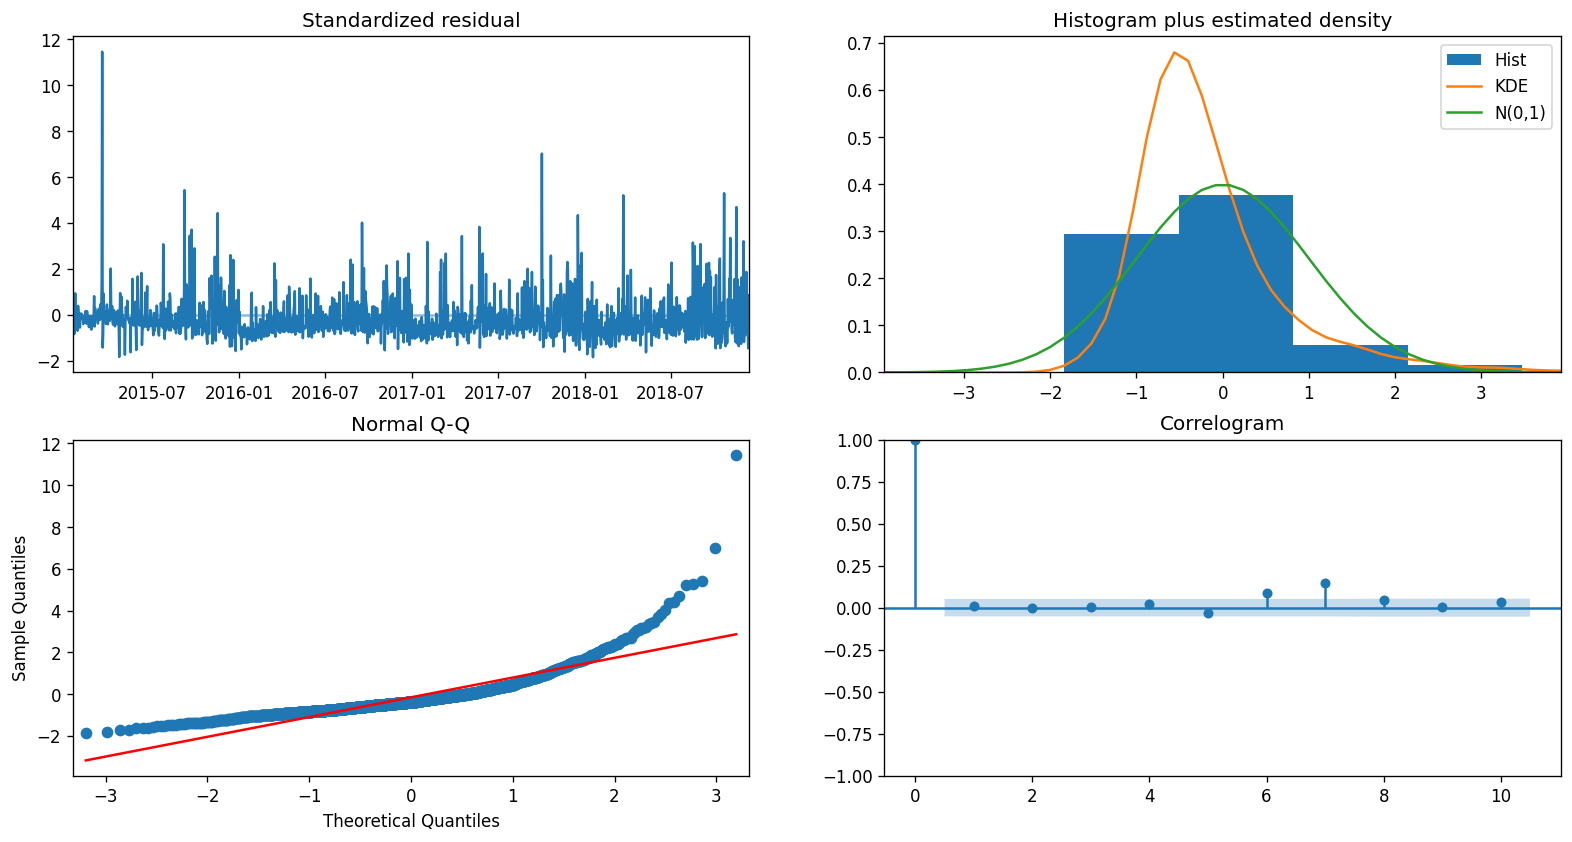

In [ ]:
model.plot_diagnostics(figsize = (16,8))
plt.show()

#Predicción

In [ ]:
arima_pred = model.predict(n_periods = len(Datos)-len(train_data) )

In [ ]:
arima_pred2 = arima_model.predict(start = '2018-11-01', end = '2018-12-30').rename("Predicciones")

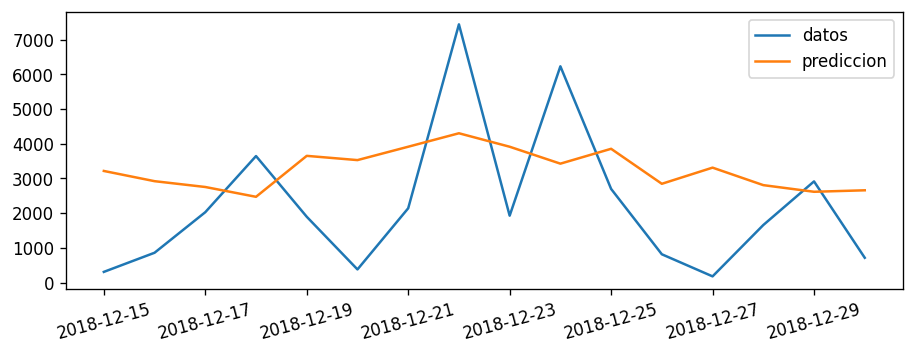

In [ ]:
plt.plot(test_data["Sales"], label = "datos")
plt.plot(arima_pred, label = "prediccion")

plt.xticks(rotation = 15)

plt.legend()

plt.show()

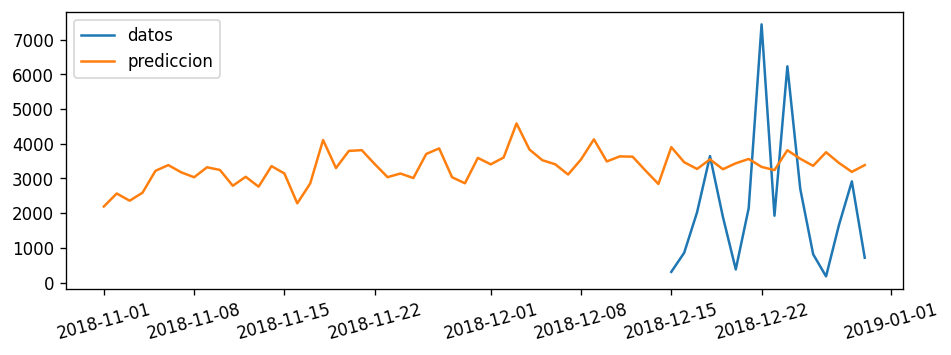

In [ ]:
plt.plot(test_data["Sales"], label = "datos")
#plt.plot(arima_pred, label = "prediccion")
plt.plot(arima_pred2, label = "prediccion")

plt.xticks(rotation = 15)

plt.legend()

plt.show()

In [ ]:
pred = arima_model.get_prediction(start=pd.to_datetime('2018-12-01'), dynamic=False)

In [ ]:
pred_ci = pred.conf_int()

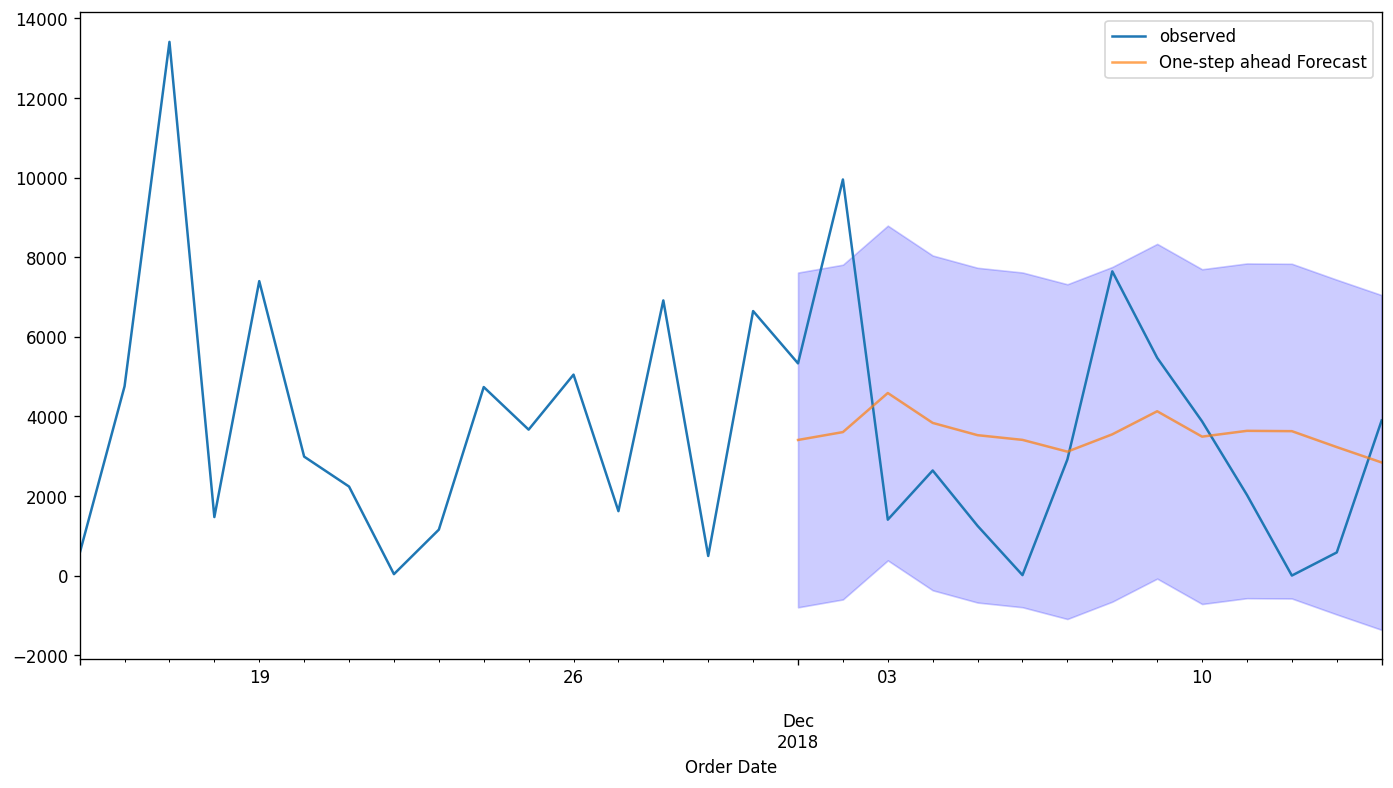

In [ ]:
ax = train_data.loc["2018-11-15":]["Sales"].plot(label='observed')

#pred.predicted_mean.plot(label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)

plt.legend()

plt.show()

#Evaluación

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = arima_model.get_forecast(steps=16).predicted_mean

In [ ]:
y_true = test_data["Sales"]

In [ ]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_true, y_pred) ) )

RMSE: 2365.1570405965062


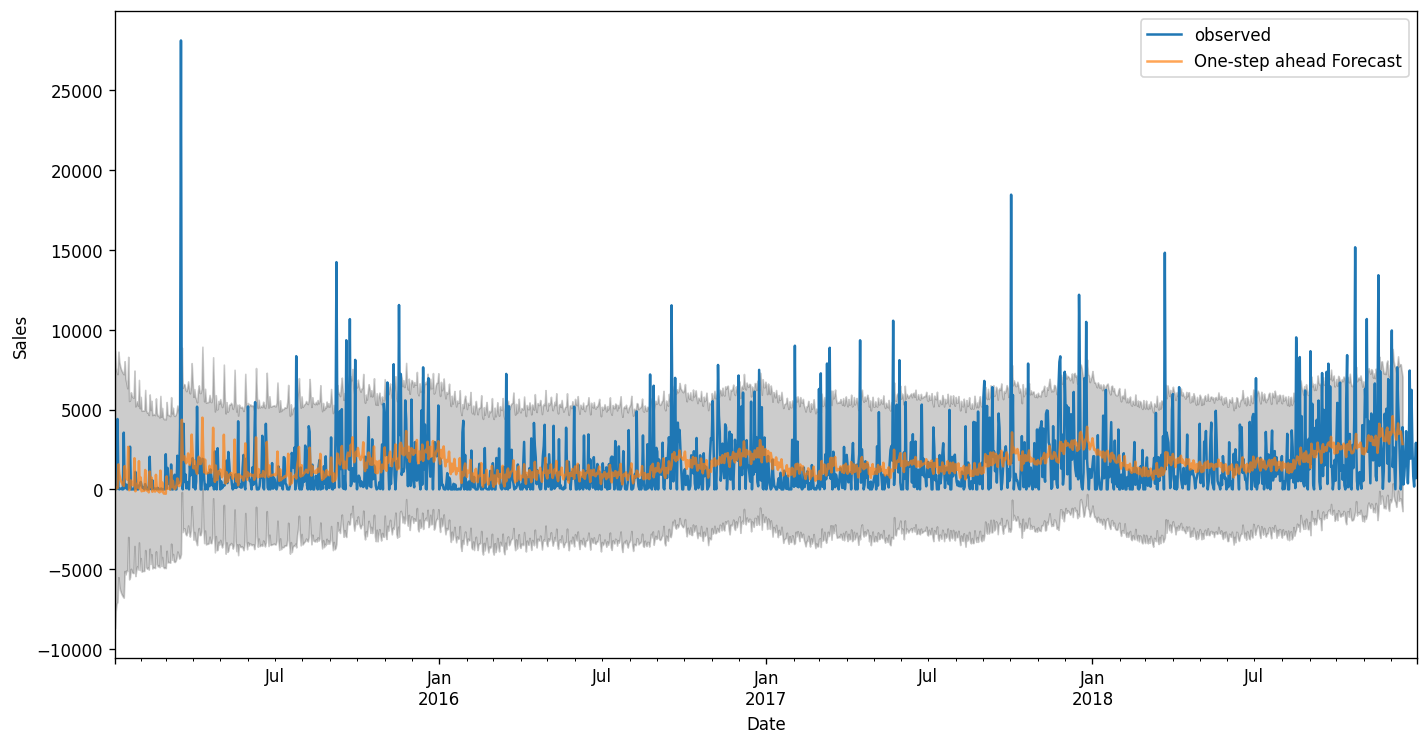

In [ ]:
pred = arima_model.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False) # variable to display plot for predicted values
pred_val = pred.conf_int()
ax = Datos["Sales"]['2014':].plot(label='observed') # displays plot for original values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) # displays plot for predicted values
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

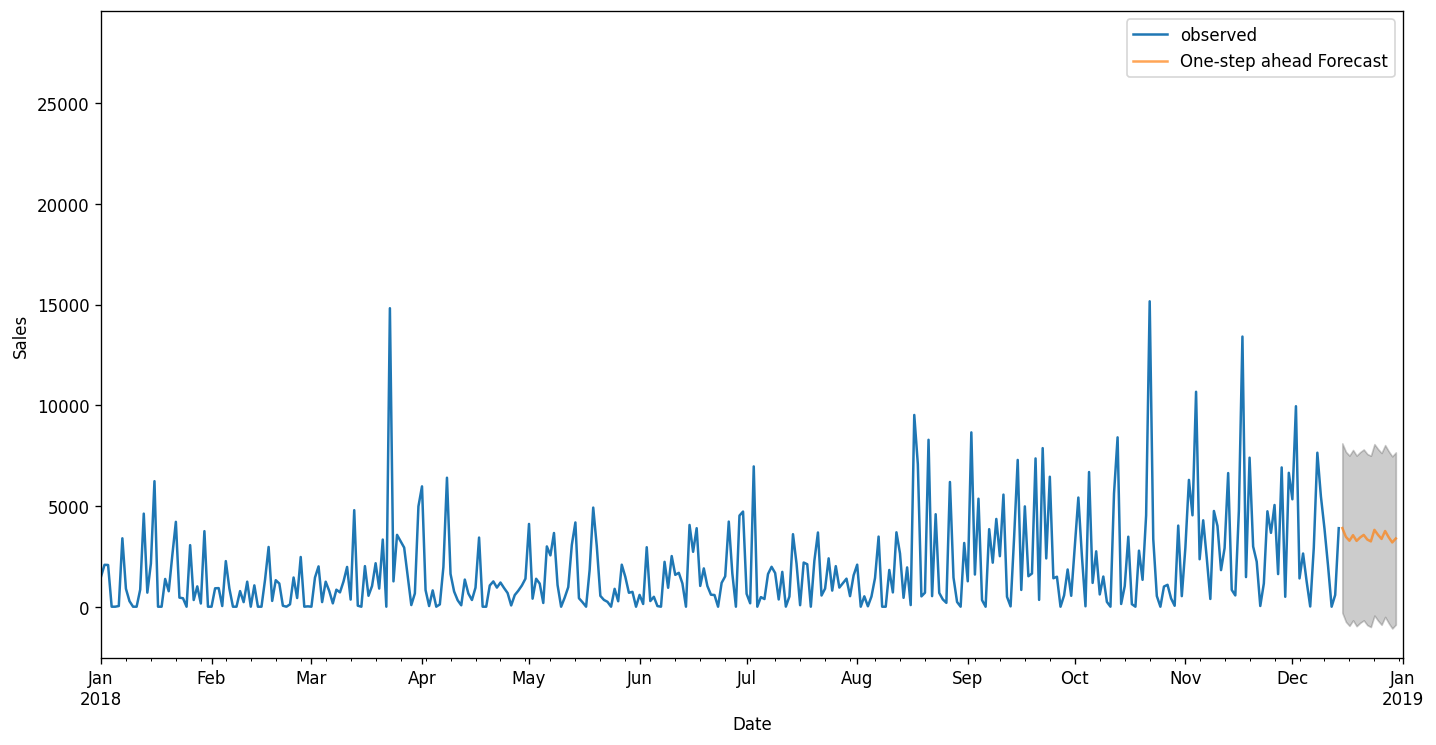

In [ ]:
ax = train_data["Sales"]['2014':].plot(label='observed') # displays plot for original values

pred = arima_model.get_forecast(steps=16, dynamic = False)#.predicted_mean # arima_model.get_prediction(start=pd.to_datetime('2018-12-15'), dynamic=False) # variable to display plot for predicted values
pred_val = pred.conf_int()
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) # displays plot for predicted values
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)

plt.xlim("2018", "2019")

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

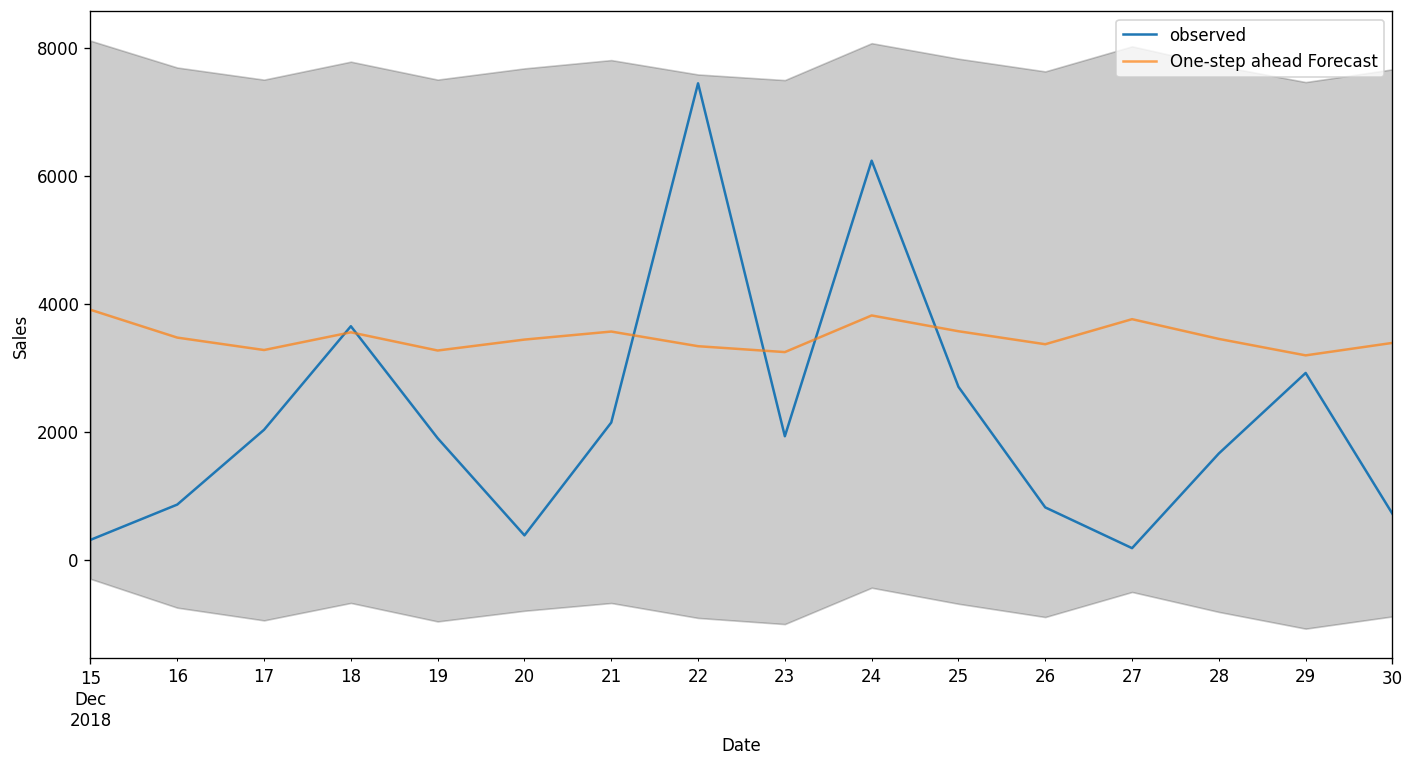

In [ ]:
pred = arima_model.get_forecast(steps=16, dynamic = False)#.predicted_mean # arima_model.get_prediction(start=pd.to_datetime('2018-12-15'), dynamic=False) # variable to display plot for predicted values
pred_val = pred.conf_int()
ax = test_data["Sales"].plot(label='observed') # displays plot for original values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) # displays plot for predicted values
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = train_data['Sales']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Mean Squared Error of the forecasts is {}'.format(round(rmse, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals

The Mean Squared Error of the forecasts is 2169.13


#Forecast

In [ ]:
fc, confint = model.predict(n_periods = 100, return_conf_int = True)

In [ ]:
index_of_fc = np.arange(len(Datos.Sales), len(Datos.Sales)+100)

In [ ]:
index_of_fc = pd.date_range('01/01/2019', periods=100, freq='D')

In [ ]:
fc_series = pd.Series(fc.values, index = index_of_fc)

In [ ]:
lower_series = pd.Series(confint[:, 0], index = index_of_fc)

In [ ]:
upper_series = pd.Series(confint[:, 1], index = index_of_fc)

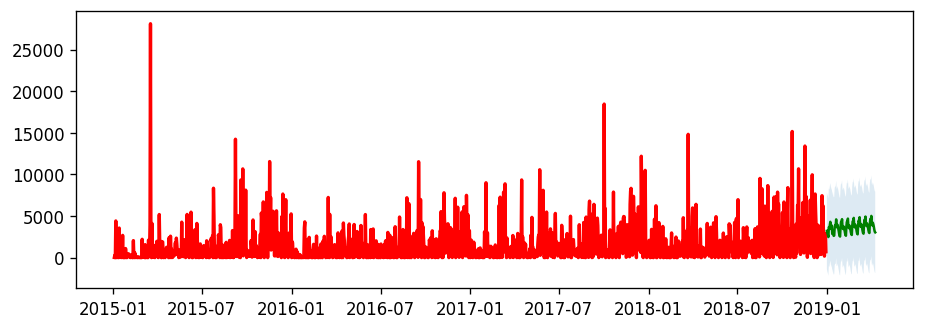

In [ ]:
plt.plot(Datos.Sales, lw = 2, color = "red")
plt.plot(fc_series, color = "green")

plt.fill_between(lower_series.index, lower_series, upper_series, alpha = 0.15)